In [5]:
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [6]:

def remove_repetitions(df: pd.DataFrame) -> pd.DataFrame:
    """
    Entfernt wiederholte Werte in einem DataFrame, wenn sich jeder Wert 4-mal wiederholt.
    Beibehaltung nur jeder vierten Zeile.
    """
    return df.iloc[::4].reset_index(drop=True)

In [7]:
da_prices2022 = remove_repetitions(pd.read_excel('./data/da_prices2022.xlsx', sheet_name='Sheet1'))
da_prices2023 = remove_repetitions(pd.read_excel('./data/da_prices2023.xlsx', sheet_name='Sheet1'))
da_prices2024 = remove_repetitions(pd.read_excel('./data/da_prices2024.xlsx', sheet_name='Sheet1'))

In [ ]:
def generateLine(dataSet, wMeanDay, wMeanWeek, wMeanMonth, meanFactor, fitFactor):
	monthLength = math.floor(dataSet.shape[0] / 12)
	weekLength = math.floor(dataSet.shape[0]  / 52)
	dayLength = math.floor(dataSet.shape[0]  / 365)


	loopStartPoint = monthLength
	loopEndPoint = dataSet.shape[0]

	forecast = []

	for h in range(loopStartPoint, loopEndPoint):
		currentHour = dataSet[h-1]
		trueValue = dataSet[h]
		dayBeforeHour = dataSet[h-dayLength]
		weekBeforeHour = dataSet[h-weekLength]
		monthBeforeHour = dataSet[h-monthLength]

		slopeDay = currentHour/dayBeforeHour
		slopeWeek = currentHour/weekBeforeHour
		slopeMonth = currentHour/monthBeforeHour

		forecast.append(hourValue(dayBeforeHour, slopeDay, slopeWeek, slopeMonth, wMeanDay, wMeanWeek, wMeanMonth, meanFactor, trueValue, fitFactor))

	return forecast


def hourValue(lastDaySameHour, slopeDay, slopeWeek, slopeMonth, wMeanDay, wMeanWeek, wMeanMonth, meanFactor, trueValue,  fitFactor):

	wMean = ((slopeDay * wMeanDay * lastDaySameHour) + (slopeWeek * wMeanWeek * lastDaySameHour) + (slopeMonth * wMeanMonth * lastDaySameHour))  
	dampDirection = np.sign(wMean - (lastDaySameHour +  slopeDay))
	rawPoint = lastDaySameHour + slopeDay
	dampedSlope =  meanFactor * (rawPoint / wMean) * dampDirection
	newValue = fitFactor * trueValue + (1-fitFactor) * (lastDaySameHour +  (slopeDay + dampedSlope))

	return newValue


In [28]:
line = generateLine(da_prices2023['Day-ahead (EUR/MWh)'], 2, 0.1, 0.05, 1.2, 0.9)

C:\Users\sebas\AppData\Local\Temp\ipykernel_40624\219725226.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  dampedSlope =  meanFactor * (rawPoint / wMean) * dampDirection
C:\Users\sebas\AppData\Local\Temp\ipykernel_40624\219725226.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  slopeDay = currentHour/dayBeforeHour
C:\Users\sebas\AppData\Local\Temp\ipykernel_40624\219725226.py:31: RuntimeWarning: invalid value encountered in scalar subtract
  dampDirection = np.sign(wMean - (lastDaySameHour +  slopeDay))
C:\Users\sebas\AppData\Local\Temp\ipykernel_40624\219725226.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dampedSlope =  meanFactor * (rawPoint / wMean) * dampDirection
C:\Users\sebas\AppData\Local\Temp\ipykernel_40624\219725226.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  slopeWeek = currentHour/weekBeforeHour
C:\Users\sebas\AppData\Local\Temp\ipykernel_40624\219725226.py:20: RuntimeWarning: invalid

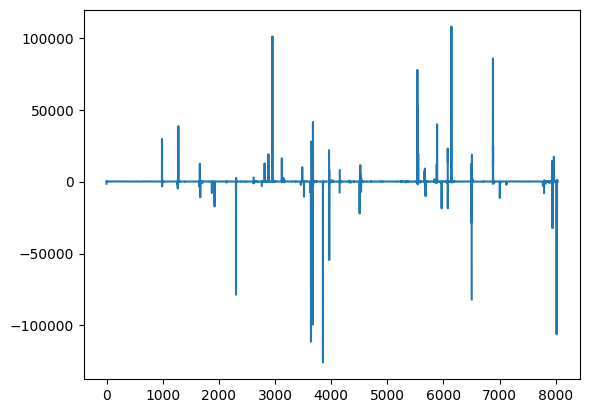

In [25]:
plt.plot(line)

In [11]:
pred = forecaster.predict_proba(fh=range(0,24))
print(pred)

Normal(columns=Index(['Day-ahead (EUR/MWh)'], dtype='object'),
       index=Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29],
      dtype='int64'),
       mu=    Day-ahead (EUR/MWh)
6             -5.020000
7             11.859180
8             33.891900
9             26.078792
10            -7.741666
11           -18.991135
12             5.922978
13            20.242997
14            -0.509642
15           -15.806591
16             3.207605
17            20.038902
18             1.840159
19           -18.683265
20            -2.627620
21            26.252386...
29            -5.400000,
       sigma=    Day-ahead (EUR/MWh)
6                   NaN
7          2.633631e-15
8          0.000000e+00
9          5.267261e-15
10         3.950446e-15
11         5.267261e-15
12         3.950446e-15
13         5.267261e-15
14         3.950446e-15
15         5.267261e-15
16         3.950446e-15
17         5.267261e-15
18         3.950446e